# Introduction to Convolutional Neural Network and Computer Vision with Tensorflow

Computer vision is the pratice of building models that are capable of discovering patterns in data. a A good example of computer vision is a face recorginition software for identifying people and preventing impersonation.

A convolutional neural network is typically a stack of convolutional layers and pooling layers and a bunch of none linear activations 

Computer vision is the pratice of writing algorithms that can discover patterns in visual data. Such as a self-driving car recognizing the car in front

## Architecture of a CNN:
* **Input images:** Target image you'd like to learn patterns in 
* **Convolution Layer:**  Extraxcts and learns tye most important features from the target images 
* **Hidden Layers:** Ads non-linearity to learned features (non-straight lines) 
* **Pooling layers:** Reduces the dimensionalities of learned image features 
* **Fully Connected Layer**: Futher refines learned features from learned layers 
* **Output Layer**: Takes learned features and outputs them in the shape of target labels 
* **Output activation**: Adds none linearitry to the ouput layer  


### What does a Convolution layer do?
It learn/extract the most important features from a traget image.

### What does the pooling layer do?
It reduces the dimensionality of the learned image feature.

## Get the data

The images we are working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

The data has been preprocessed by Mrdbourke.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-08-27 20:01:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.182.128, 64.233.183.128, 173.194.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.182.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   143MB/s    in 0.7s    

2022-08-27 20:01:42 (143 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with the data)

A very crucial step at the beginning of any machine learning project is becoming one with the data. And for a computer vision project... this usually means visualizing the samples of your data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os 

# Let's walk through pizza_stake directory and list the number of files
for dirpath, dirnames, filenames in os.walk("pizza_ssteak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


In [ ]:
# The extra file in the pizza_steak directory is ".DS_store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Aug 27 20:01 .
drwxr-xr-x 1 root root 4096 Aug 27 20:01 ..
drwxr-xr-x 4 root root 4096 Aug 27 20:01 test
drwxr-xr-x 4 root root 4096 Aug 27 20:01 train


In [ ]:
# Another way to find out how many images are in a file.
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

## To visualize our images, first lets get the class name programatically. There actually a fair few ways to visualize your data.

In [ ]:
# Get the classname programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_name = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class name from the subdirectory
# class_name = class_name
print(class_name)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_img = random.sample(os.listdir(target_folder), 1)
  print(random_img)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['2172600.jpg']
Image shape: (512, 512, 3)


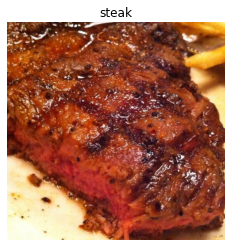

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
# The images we've imported and plotted are quite giant arrays/tensors of pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[122,  59,  18],
        [128,  65,  24],
        [128,  66,  25],
        ...,
        [255, 240, 140],
        [255, 240, 145],
        [255, 237, 143]],

       [[132,  69,  28],
        [130,  68,  27],
        [126,  64,  23],
        ...,
        [255, 239, 137],
        [255, 240, 142],
        [255, 239, 145]],

       [[136,  74,  35],
        [131,  69,  30],
        [124,  62,  23],
        ...,
        [254, 237, 133],
        [255, 237, 137],
        [255, 240, 142]],

       ...,

       [[253, 255, 233],
        [253, 255, 233],
        [253, 255, 231],
        ...,
        [251, 224, 147],
        [250, 223, 144],
        [251, 224, 143]],

       [[253, 255, 233],
        [253, 255, 233],
        [253, 255, 231],
        ...,
        [255, 228, 149],
        [253, 226, 145],
        [251, 226, 144]],

       [[253, 255, 233],
        [253, 255, 233],
        [253, 255, 231],
        ...,
        [251, 226, 14

In [ ]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

**Note:** As we've discussed before, many machine learning models, including neural network prefer the values they work with to be between 0 and 1. knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the arrays by 255.(since 255 is the maximum pixel value)

In [ ]:
# Get all the pixel values between 0 & 1
img/225.

array([[[0.54222222, 0.26222222, 0.08      ],
        [0.56888889, 0.28888889, 0.10666667],
        [0.56888889, 0.29333333, 0.11111111],
        ...,
        [1.13333333, 1.06666667, 0.62222222],
        [1.13333333, 1.06666667, 0.64444444],
        [1.13333333, 1.05333333, 0.63555556]],

       [[0.58666667, 0.30666667, 0.12444444],
        [0.57777778, 0.30222222, 0.12      ],
        [0.56      , 0.28444444, 0.10222222],
        ...,
        [1.13333333, 1.06222222, 0.60888889],
        [1.13333333, 1.06666667, 0.63111111],
        [1.13333333, 1.06222222, 0.64444444]],

       [[0.60444444, 0.32888889, 0.15555556],
        [0.58222222, 0.30666667, 0.13333333],
        [0.55111111, 0.27555556, 0.10222222],
        ...,
        [1.12888889, 1.05333333, 0.59111111],
        [1.13333333, 1.05333333, 0.60888889],
        [1.13333333, 1.06666667, 0.63111111]],

       ...,

       [[1.12444444, 1.13333333, 1.03555556],
        [1.12444444, 1.13333333, 1.03555556],
        [1.12444444, 1

## An end-to-end example

Lets's build a convolutional neural network to find patterns in our images, morespecifically
* Load our images
* Preprocess our images
* Build CNN to find patterns in our images 
* Fit CNN to our training data 



In [ ]:
import tensorflow as tf
from  tensorflow.keras.preprocessing.image import ImageDataGenerator

# set random seed 
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, this is also called scalling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories 
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the TINY VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 113s 2s/step - loss: 0.5915 - accuracy: 0.6647 - val_loss: 0.3970 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 112s 2s/step - loss: 0.4296 - accuracy: 0.8053 - val_loss: 0.3524 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 112s 2s/step - loss: 0.3950 - accuracy: 0.8420 - val_loss: 0.3320 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 112s 2s/step - loss: 0.3853 - accuracy: 0.8293 - val_loss: 0.3222 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 111s 2s/step - loss: 0.3368 - accuracy: 0.8600 - val_loss: 0.2778 - val_accuracy: 0.8840


In [ ]:
# Get model summary and compare with https://poloclub.github.io/cnn-explainer/
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

Let's replicat the model we've built in our previous notebok here.. The model we are building is from the [Tensorflow playground](colab.research.google.com/drive/1VOxQixP0JIy1Lxw3bL4ZoNDhllxIJouj?authuser=1#scrollTo=c48QdAdjvMY_)

In [ ]:
# Set random seed 
tf.random.set_seed(42)

# Create a model to replicate the tensorflow playground model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 236ms/step - loss: 0.9368 - accuracy: 0.4780 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 11s 229ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 230ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 11s 231ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 11s 230ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having over 20x parameters to our model_2 it still didn't beat the result of model_1

In [ ]:
# Set random seed 
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.layers.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metric=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

AttributeError: ignored

# Binary Classification: Let's break it down

## Become one with the data

## Preprocess the data 

## Create a CNN model (start with the baseline)

## Fit the model

## Evaluate the model

## Adjust the models parameter

## Data Augmentation

## Repeat until sartisfied

# Multi-class Image Classification

1. Become one with the data
2. Preprocess the data (get it ready for the model)
3. Create the model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reeduce overfitting)
7. Repeat until sartisfied

## 1. Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref =  zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Lets work through our 10 classes of food classes

import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.") 

In [ ]:
!ls -la 10_food_classes_all_data/

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

In [ ]:
# Visualize, Visualize, Visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [ ]:
random.choice(class_names)